---

# ✈️🧳 **BACKGROUND** 🧳✈️

Airbnb has transformed the hospitality industry by offering travellers an array of personalised accommodations and unique experiences. Airbnb listings are available in every nook and cranny of the world, and the large volume of data generated on the platform can illuminate customer preferences, market dynamics, and operational effectiveness. Data science aids in processing this information for improving user interactions, developing pricing models, and strategic business planning.

In Thailand, Airbnbs have attractive prices and the market is booming in Bangkok, positively impacting hospitality in the city. With a growing number of tourists wanting exotic destinations and flexible booking schedules, Airbnb has emerged as an important player with offers ranging from private rooms to whole homes. Nevertheless, this surge also comes with problems, especially for the traditional hotels that are now dealing with competition from short-term rentals that are not regulated.

## Problem Statement
+ Regulatory Issues: Unrestricted rentals expose hotels to negative externalities.
+ Market Disruption: Zero-cost renting results in unsustainable price levels.

Furthermore, for hosts to remain competitive in the Airbnb ecosystem of Bangkok, understanding local tastes and tailoring listings accordingly is critical. Nonetheless, managing this information to gain valuable insights presents a set of challenges due to the data’s multifaceted nature and sheer size.

## Insight Questions

In regards to understanding the social dynamics of the Airbnb ecosystem in Bangkok, the following questions of interest need answering:

1. **What types of accommodations are most sought after by travellers or people who wants to stay in Bangkok?** (Top5)

2. **What alterations can be made to the listings to enable competition with hotels and other short-term rental properties?**

3. **What changes to regulations would better serve the hotel industry while allowing benefits to short-term rentals?**

4. **Is the Host Name in alphabetical (English) more popular compared to the other Host Name that are using either Korean, Chinese(Mandarin) and Thai languages?**
   
5. **Are there any correlations in any of the columns from the dataset?**

## Goals

- **Data Analysis**: Analyse Airbnb datasets to capture customer needs, and listing performance within Bangkok, focusing on Host & Host Name

- **Finding the correlations**: Analyze and investigate the correlations between the columns listed from the dataset.

- **Regulatory Impact**: Investigate how the changing regulatory framework has affected Airbnb listings within Bangkok.

---

> ## Let's understand the dataset! ➡️ *(.csv file)*:
Description for Airbnb Bangkok Dataset:

- `id`: Airbnb's unique identifier for the listing
- `name`: Name of the listing
- `host_id`: Airbnb's unique identifier for the host/user
- `host_name`: Name of the host. Usually, just the first name(s)
- `neighborhood`: The neighborhood geocoded using latitude and longitude
- `latitude`: Uses the World Geodetic System (WGS84) projection
- `longitude`: Uses the World Geodetic System (WGS84) projection
- `room_type`: Categories include 
  - `Entire home/apt`,   `Private room`  ,  `Shared room`  ,  `Hotel`
    - **Entire place**: Whole space to yourself, includes bedroom, bathroom, kitchen
    - **Private rooms**: Private sleeping area but may share spaces with others
    - **Shared rooms**: Sleeping space shared with others
- `price`: Daily price in local currency
- `minimum_nights`: Minimum number of night stays required
- `number_of_reviews`: The number of reviews the listing has in total
- `last_review`: The date of the last/newest review
- `calculated_host_listings_count`: Number of listings the host has in the current scrape
- `availability_365`: Number of days the listing is available in the next 365 days
- `number_of_reviews_ltm`: Number of reviews in the last 12 months


---

Importing the libraries that I might use in this Capstone2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy.stats import shapiro
from scipy.stats import f_oneway as anova

import warnings 
warnings.filterwarnings('ignore') 
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [3]:
df_raw = pd.read_csv('Airbnb Listings Bangkok.csv')
df_raw.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaN,NaN,3,365,0


In [4]:
df_raw.tail()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaN,NaN,14,365,0


---

Import GEOJSON Bangkok to this Capstone 2 Project

In [5]:
import json

with open('Bangkok-districts.geojson', 'r') as file:
    bangkok_geojson = json.load(file)

---

Copying the original DF (df_raw) to df (to new DataFrame, the one I can operate with)

In [6]:
df = df_raw.copy()
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaN,NaN,14,365,0


Checking the info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Describing the Dataframe per each columns

In [8]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,10064.00,15854.00,15854.00,15854.00
mean,7926.50,157939679701701248.00,154105783.58,13.75,100.56,3217.70,15.29,16.65,0.81,13.89,244.38,3.48
std,4576.80,294601541771321472.00,131872648.11,0.04,0.05,24972.12,50.82,40.61,1.09,30.27,125.84,8.92
min,0.00,27934.00,58920.00,13.53,100.33,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,3963.25,21045091.50,39744308.00,13.72,100.53,900.00,1.00,0.00,0.12,1.00,138.00,0.00
50%,7926.50,35037340.00,122455569.00,13.74,100.56,1429.00,1.00,2.00,0.43,4.00,309.00,0.00
75%,11889.75,52561542.25,239054687.50,13.76,100.59,2429.00,7.00,13.00,1.06,13.00,360.00,3.00
max,15853.00,790816217344482048.00,492665929.00,13.95,100.92,1100000.00,1125.00,1224.00,19.13,228.00,365.00,325.00


---

Check Missing Values (using `isna` or `isnull`, and `.sum()`)

In [9]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Checking missing values per column

In [10]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [11]:
df['reviews_per_month'].isna().sum()

5790

In [12]:
df['host_name'].isna().sum()

1

In [13]:
df['name'].nunique()

14794

In [14]:
df['name'].value_counts().sum()

15846

In [15]:
df['last_review'].isna().sum()

5790

In [16]:
df['reviews_per_month'].isna().sum()

5790

Checking the total data in reviews_per_months column

In [17]:
len(df['reviews_per_month'])

15854

Checking the DataFrame (columns, rows)

In [18]:
df.shape

(15854, 17)

---

Converting last_review to datetime type.

In [19]:
df['last_review'] = pd.to_datetime(df['last_review'])

Checking total count, mean, minimum, maximum, 25%, 50%, and 75%, maximum and also the standart deviation for each columns

In [20]:
df.describe().reset_index()

,index,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,count,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,10064,10064.00,15854.00,15854.00,15854.00
1,mean,7926.50,157939679701701248.00,154105783.58,13.75,100.56,3217.70,15.29,16.65,2021-08-30 08:37:49.316375296,0.81,13.89,244.38,3.48
2,min,0.00,27934.00,58920.00,13.53,100.33,0.00,1.00,0.00,2012-12-15 00:00:00,0.01,1.00,0.00,0.00
3,25%,3963.25,21045091.50,39744308.00,13.72,100.53,900.00,1.00,0.00,2020-02-20 00:00:00,0.12,1.00,138.00,0.00
4,50%,7926.50,35037340.00,122455569.00,13.74,100.56,1429.00,1.00,2.00,2022-10-24 00:00:00,0.43,4.00,309.00,0.00
5,75%,11889.75,52561542.25,239054687.50,13.76,100.59,2429.00,7.00,13.00,2022-12-08 00:00:00,1.06,13.00,360.00,3.00
6,max,15853.00,790816217344482048.00,492665929.00,13.95,100.92,1100000.00,1125.00,1224.00,2022-12-28 00:00:00,19.13,228.00,365.00,325.00
7,std,4576.80,294601541771321472.00,131872648.11,0.04,0.05,24972.12,50.82,40.61,NaN,1.09,30.27,125.84,8.92


---
---

> ## Handling Missing Values appropriately

- For Numerical columns: I can fill it using median or 0, but in here I chose to use median.
- For Categorical columns, I can fill the blanks/missing values using `Unknown` because we do not know adnd didn't receive any information about the categorical columns.
- Not forgetting to convert the date columns to datetime.

Removing a row, with `host_name` and `price` empty or have missing values on both column, which is `important` and `crucial` in this dataset, and it is missing from both columns. So in this case, I chose to drop the whole row.

> ## Starting to make a clean df as df_clean

Dropping the whole row, where `host_name` and `price` have missing values, using `df.dropna`

In [21]:
# Remove rows where specific columns have missing values
df_clean = df.dropna(subset=['host_name', 'price'])
df_clean

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaT,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaT,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaT,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaT,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0


Now I'm removing the `Unnamed` column because it `isn't important` or `unnecessary`, so I'm using `df.drop`

In [22]:
df_clean = df.drop(columns=['Unnamed: 0'])
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaT,NaN,3,365,0


Checking the `df_clean`, and also checking the `columns, rows`

In [23]:
df_clean

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaT,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0


### Changing from NAN to Unknown

Filling the missing value as 0 from these columns
fill_u = ['id', 'name', 'total_reviews', 'total_reviews_ltm', 'count']
for col in fill_u:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0)

In [24]:
df_clean.shape

(15854, 16)

I removed one row, from 15854 to 15853, the one with missing value `Price` and `Name` because seems like it isn't like the others, with host name and price. This one doesn't have that so I chose to delete it from the table **(in df_clean)**

Now I need to handle other missing values.

For numeric and categorical columns appropriately:
- For numeric columns, we can choose: `mean, median, or 0`
- For categorical columns, we can choose either *the most frequent value* or *Unknown*: I chose `Unknown`
- For date columns convert them to `datetime`

In [25]:
# For numeric columns, you might use mean, median, or 0
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
for col in numeric_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Adding 'Unknown' to the categories of room_type before filling missing values
if 'room_type' in df_clean.columns and df_clean['room_type'].dtype.name == 'category':
    df_clean['room_type'] = df_clean['room_type'].cat.add_categories('Unknown')
df_clean['room_type'].fillna('Unknown', inplace=True)

# Converting date columns to datetime
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])

# converting room_type to category (if not already done)
if df_clean['room_type'].dtype.name != 'category':
    df_clean['room_type'] = df_clean['room_type'].astype('category')

# converting neighbourhood to category
df_clean['neighbourhood'] = df_clean['neighbourhood'].astype('category')

# rename 1 host_name that's empty from the dataset, to 'Unknown'
df_clean['host_name'].fillna('Unknown', inplace=True)

# converting host_id to string
df_clean['host_id'] = df_clean['host_id'].astype(str)

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  object        
 3   host_name                       15854 non-null  object        
 4   neighbourhood                   15854 non-null  category      
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  category      
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

In [27]:
df_clean.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,10064,10064.00,15854.00,15854.00,15854.00
mean,157939679701701248.00,13.75,100.56,3217.70,15.29,16.65,2021-08-30 08:37:49.316375296,0.81,13.89,244.38,3.48
min,27934.00,13.53,100.33,0.00,1.00,0.00,2012-12-15 00:00:00,0.01,1.00,0.00,0.00
25%,21045091.50,13.72,100.53,900.00,1.00,0.00,2020-02-20 00:00:00,0.12,1.00,138.00,0.00
50%,35037340.00,13.74,100.56,1429.00,1.00,2.00,2022-10-24 00:00:00,0.43,4.00,309.00,0.00
75%,52561542.25,13.76,100.59,2429.00,7.00,13.00,2022-12-08 00:00:00,1.06,13.00,360.00,3.00
max,790816217344482048.00,13.95,100.92,1100000.00,1125.00,1224.00,2022-12-28 00:00:00,19.13,228.00,365.00,325.00
std,294601541771321472.00,0.04,0.05,24972.12,50.82,40.61,NaN,1.09,30.27,125.84,8.92


---

# New aim/goals!

### Checking if someone (if there's a host) with multiple housing listing (more than 1) available to rent?

In [28]:
# Create new df, using group by host_name and host_id, and count the number of listings
host_listings = df.groupby(['host_name', 'host_id']).size().reset_index(name='listing_count')

# Checking/Filtering the hosts with more than 1 listing name
top_hosts = host_listings[host_listings['listing_count'] > 1]

# Sorting the top hosts by listing_count in descending order (ascending = False)
top_hosts = top_hosts.sort_values(by='listing_count', ascending=False).reset_index(drop=True)
top_hosts

,host_name,host_id,listing_count
0,Curry,201677068,228
1,Noons,52161947,99
2,K,26736483,89
3,Dusadee,68154488,62
4,Pornchai,228535635,62
...,...,...,...
2048,Natthaphon,16232330,2
2049,Ruthai,50965084,2
2050,Natthakrit,106579724,2
2051,Ryan,183743871,2


In [29]:
# Checking the total number of hosts, that have more than 1 listing name
len(top_hosts)

2053

In [30]:
# Showing the TOP 10 Host with Most Listings
top_hosts.sort_values(by ='listing_count', ascending = False).head(10)

,host_name,host_id,listing_count
0,Curry,201677068,228
1,Noons,52161947,99
2,K,26736483,89
4,Pornchai,228535635,62
3,Dusadee,68154488,62
5,Ludoping,62257044,56
6,Kiattisak,8444643,53
7,Nana,314945555,49
8,Mike,312545246,49
9,Panda,66923696,48


- We found out that there are 2053 Hosts, that have more than 1 listing name for rent, from total 15.000 datas.
- The top 10 Host ID with the most listing count:
  - Host ID number 201677068 (Host Curry) have the most listing count in AirBNB Bangkok Dataset, they have 228 total listing, listed in AirBNB (Bangkok)

---

## Checking mix & max from last review and minimun nights

In [31]:
df_clean['last_review'].min()

Timestamp('2012-12-15 00:00:00')

In [32]:
df_clean['last_review'].max()

Timestamp('2022-12-28 00:00:00')

> Insight!
- We understand that from the dataset we get is from 15th December in 2012 to 28th december in 2022.
- In 10 years activity from the host listing names in Airbnb Bangkok, Thailand

In [33]:
df_clean['minimum_nights'].min()

1

In [34]:
df_clean['minimum_nights'].max()

1125

> Insight!
- We understand that the minimum night is 1 night from this dataset
- Meanwhile,the lenght how long people can rent the place is 1125 days.
  - Or at least for 3 years and 1 month...

---

## Handling Outliers for each house type(s)!

Goal! Checking price outliers for overprice/underprice?

Checking outliers usisng IQR in Price column.
- LB = Lower Bounds
- UB = Upper Bounds

In [35]:
Q1 = df['price'].quantile(0.25) # 25%
Q3 = df['price'].quantile(0.75) # 75#
IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

In [36]:
# Checking Lower Bounds (Outliers)
LB

-1393.5

In [37]:
# Check Upper Bounds (Outliers)
UB

4722.5

Creating Boxplot for IQR (Upper and Lower Bounds)

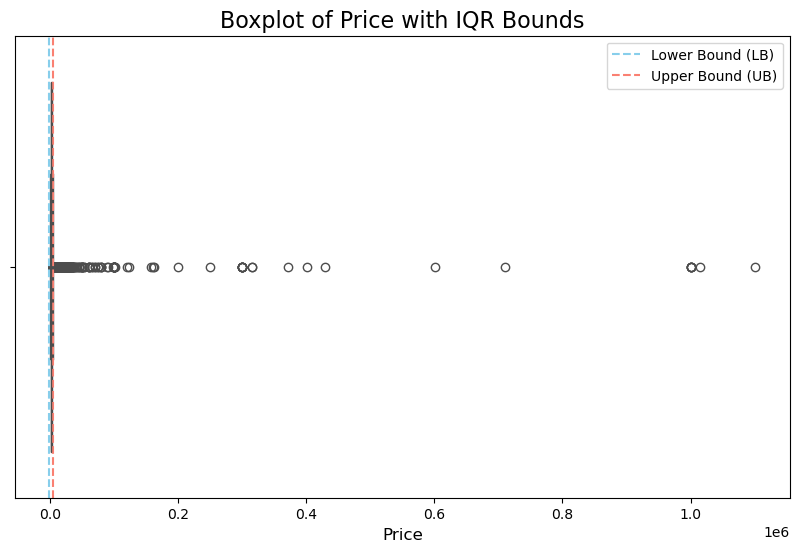

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='grey')
plt.axvline(LB, color='skyblue', linestyle='--', label='Lower Bound (LB)')
plt.axvline(UB, color='salmon', linestyle='--', label='Upper Bound (UB)')
plt.title('Boxplot of Price with IQR Bounds', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.legend()
plt.show()

Since the IQR for Price cannot be seen clearly... So I decided to check the IQR for each room types!

Outlier Boxplot? Neutral/Odd? Treatment Outliers? for each:
- house/apt
- shared room
- hotel

### Checking Outliers for all room type(s)

In [39]:
# Calculate UB and LB for each room type(s)
room_types = df['room_type'].unique()
room_type_UBLB = {}

for room_type in room_types:
    room_prices = df[df['room_type'] == room_type]['price']
    Q1 = room_prices.quantile(0.25)
    Q3 = room_prices.quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    room_type_UBLB[room_type] = {'LB': LB, 'UB': UB}

# Display the bounds for each room type
room_type_UBLB

{'Entire home/apt': {'LB': -1286.5, 'UB': 4885.5},
 'Private room': {'LB': -1138.0, 'UB': 4030.0},
 'Hotel room': {'LB': -2267.5, 'UB': 6432.5},
 'Shared room': {'LB': 0.0, 'UB': 1040.0}}

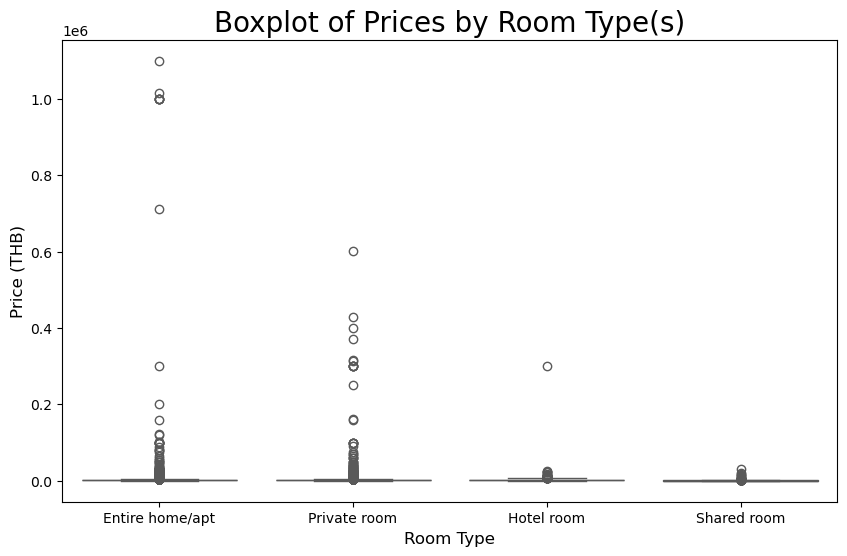

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='price', palette='Spectral')
plt.title('Boxplot of Prices by Room Type(s)', fontsize=20)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price (THB)', fontsize=12)
plt.show()

> Insight from Room Type(s) outliers!

- We can see that there are some outliers from **Entire home/apt** room type
- We can also see that there are a few outliers from **Private room**, room type

From 'Price' columnm we can find that the prices ranges from **0 to 1,100,000 THB**,
- with a *mean* of **3,217.70 THB**
- and *standart deviation* **24,972.12 THB**

In [41]:
# Calculate skewness for the 'price' column
price_skew= df_clean['price'].skew()
price_skew

33.88323712944162

The skewness of 'Price' column is 33.88323712944162

---

> ### Now let's check the df_clean!

In [42]:
df_clean.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Even if df_clean there is still missing values in 'last_review' and 'reviews_per_month' columns. I decided not to drop, remove, delete, so I decidede to just let it be.

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  object        
 3   host_name                       15854 non-null  object        
 4   neighbourhood                   15854 non-null  category      
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  category      
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

In [44]:
df_clean.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,10064,10064.00,15854.00,15854.00,15854.00
mean,157939679701701248.00,13.75,100.56,3217.70,15.29,16.65,2021-08-30 08:37:49.316375296,0.81,13.89,244.38,3.48
min,27934.00,13.53,100.33,0.00,1.00,0.00,2012-12-15 00:00:00,0.01,1.00,0.00,0.00
25%,21045091.50,13.72,100.53,900.00,1.00,0.00,2020-02-20 00:00:00,0.12,1.00,138.00,0.00
50%,35037340.00,13.74,100.56,1429.00,1.00,2.00,2022-10-24 00:00:00,0.43,4.00,309.00,0.00
75%,52561542.25,13.76,100.59,2429.00,7.00,13.00,2022-12-08 00:00:00,1.06,13.00,360.00,3.00
max,790816217344482048.00,13.95,100.92,1100000.00,1125.00,1224.00,2022-12-28 00:00:00,19.13,228.00,365.00,325.00
std,294601541771321472.00,0.04,0.05,24972.12,50.82,40.61,NaN,1.09,30.27,125.84,8.92


In [45]:
df_clean['availability_365'].value_counts()

availability_365
365    2392
0       857
364     674
180     437
90      334
       ... 
183       2
20        2
193       1
197       1
192       1
Name: count, Length: 366, dtype: int64

- We found out that number of reviews ltm (last 12 months) some of them are 0
- We found out that from the dataset that `number of reviews` and `last reviews`, are empty or 0, like `reviews ltm`
- We also found out that there is `857` places from the data that seems like availability = 0.
  - Availability: a listing may be `unavailable` because it has been booked by a guest or blocked by the host.
  - Either `unavailable` due to `a lot of bookings` or `the host didn't share` any information about it to us.

- Availability 365 = 0 diabaikan.
  - Tapi yang lain boleh diambil insightnya.
- Availability 365 = 365 
  - Insightnya? Aktif? Harga? Lokasi? Overprice/No?

---

> # **Exploratory Data Analysis (EDA)**

> ### This Capstone Project 2 aims to: (for now)
Objectives and Focus Areas
1. Price Distribution by Neighborhood
     - Objective: Analyze price variations across Bangkok neighborhoods.
     - Method: Calculate mean and median prices per neighborhood; visualize using histograms or box plots in Jupyter and a map view in Tableau.
2. Room Type Popularity
    - Objective: Examine the popularity of different room types (Entire home/apt, Private room, Shared room) by listings and reviews.
    - Method: Count listings per room type and calculate average reviews; visualize using bar charts in Jupyter and Tableau.
3. Is the Host_Name (Listing) with Thai Languages less popular compared to the one with alphabeticals?
4. Additional Analysis
    - Soon to be addedd (TBA)
- Example: What room type is popular in each neighbourhood(s)?

---
---

> ## Let's dive into the dataset and explore it!

---
---

Let's get to it!
- Firstly let's check the room types (all of them!) also checking their popularity?


> ### Room Types & Popularity! ***(count them!)***

In [46]:
# Room types
room_types= df['room_type'].value_counts()
room_types

room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

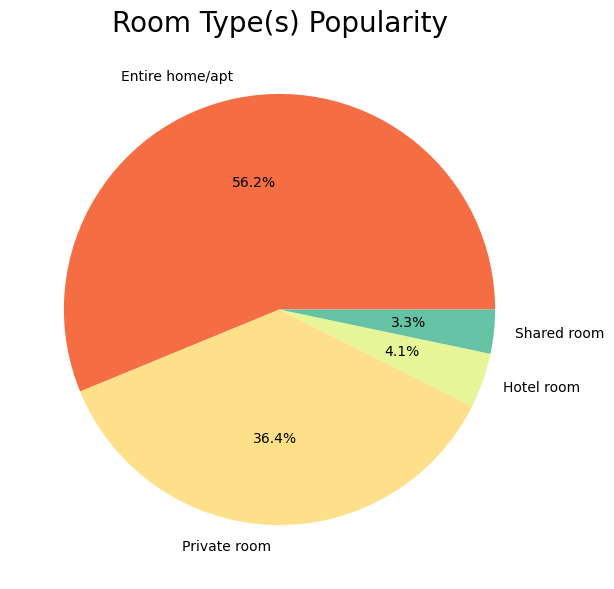

In [47]:
# Visualize the pie plot
plt.figure(figsize=(10,7))
df['room_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Spectral', len(df['room_type'].unique())))
plt.title('Room Type(s) Popularity', size=20)
plt.ylabel('')
plt.show()

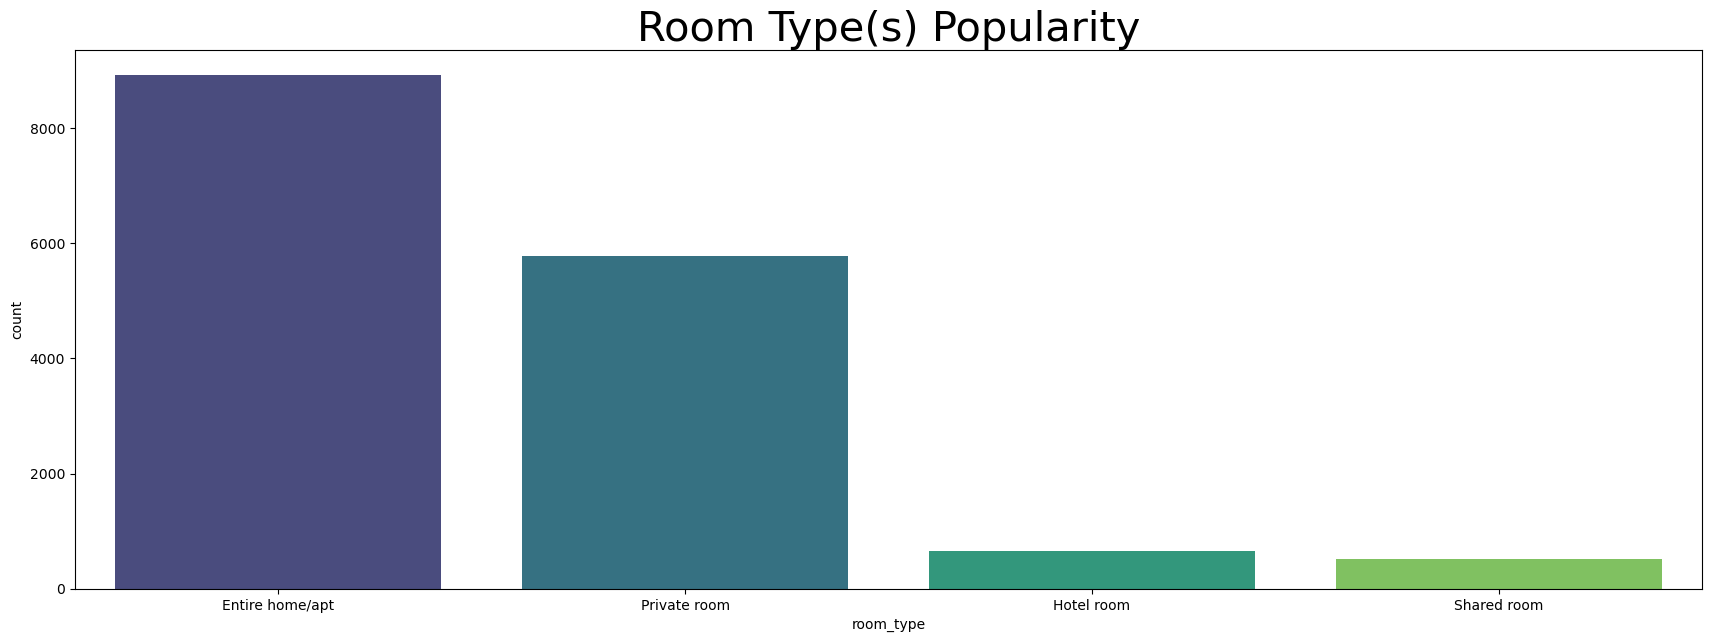

In [48]:
# Visualize the plot in Barplot
plt.figure(figsize=(21,7))
sns.countplot(x='room_type', data=df, palette='viridis')
plt.title('Room Type(s) Popularity', size=30)
plt.show()

What we can understand from the visualization above:
- Entire house/apt (apartement) is more likely to be popular among Airbnb user in Bangkok (Thailand)
- The second most popular room type among Airbnb user in Bangkok (Thailand) is Private room.
- Entire home/apartement and Private room are the top 2 popular and favorite room type, compared to Hotel room and Shared room.
- Between Hotel room and Shared room, there is a slightly difference.
- Between a (Entire home/apt & Private room) and b (Hotel room & Shared room) there is a huge difference.
- We can assume that people are more likely to rent and they value their privacy a lot, and preferred to rent the entire home or a private room, compared to staying at the Hotel or Shared rooms.
  - They value their privacy a lot
  - They might be preferred to live at a house/apartement compared to staying at the Hotel, probably because of the view and atmosphere.

---

Let's find out about the `price` distribution, shall we?

> ### Price Distribution, by Neighbourhood (THB)

In [49]:
df_clean['neighbourhood'].value_counts().reset_index()

,neighbourhood,count
0,Vadhana,2153
1,Khlong Toei,2097
2,Huai Khwang,1125
3,Ratchathewi,1114
4,Bang Rak,827
5,Sathon,809
6,Phra Nakhon,619
7,Phra Khanong,558
8,Chatu Chak,548
9,Bang Na,458


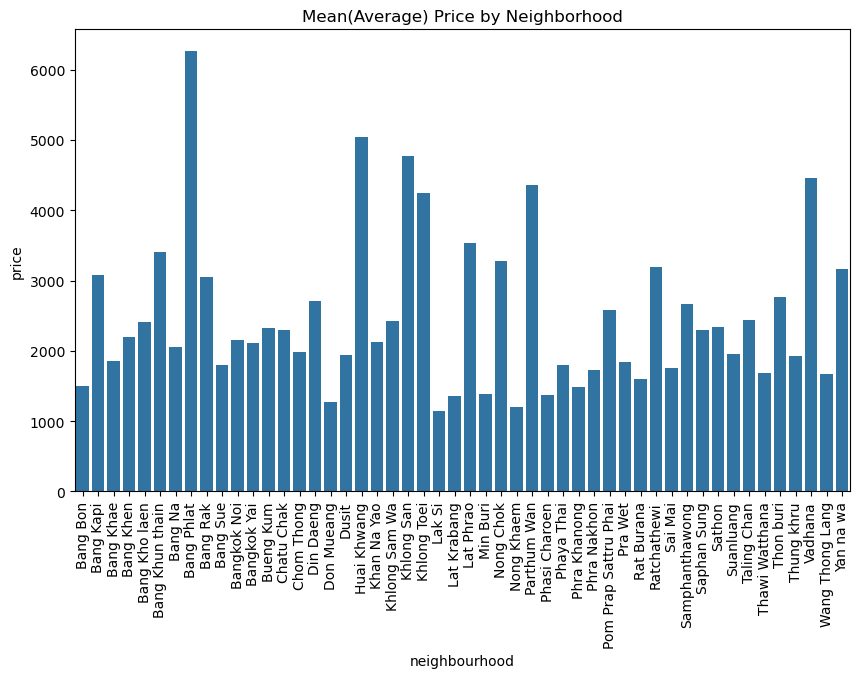

In [50]:
# Calculate mean price by neighborhood
mean_prices = df.groupby('neighbourhood')['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='neighbourhood', y='price', data=mean_prices)
plt.title('Mean(Average) Price by Neighborhood')
plt.xticks(rotation=90)
plt.show()


---

> ### Check the Top5 Luxury or Most Expensive room_type & by neighbourhood and Room Types

In [51]:
df_clean[['price', 'room_type', 'neighbourhood']].value_counts().reset_index().head(5)

,price,room_type,neighbourhood,count
0,550,Shared room,Phra Nakhon,62
1,1057,Entire home/apt,Huai Khwang,53
2,2527,Entire home/apt,Ratchathewi,40
3,1466,Entire home/apt,Ratchathewi,39
4,1000,Entire home/apt,Huai Khwang,38


In [52]:
# Get the top 5 rows
top5 = df_clean[['price', 'room_type', 'neighbourhood']].value_counts().reset_index().head(5)
top5.columns = ['price', 'room_type', 'neighbourhood', 'count']

In [53]:
# Top 5 room types
top5_rooms = df['room_type'].value_counts().head(5)
print("Top 5 Room Types:")
print(top5_rooms)

# Top 5 neighborhoods
top5_neighbourhoods = df['neighbourhood'].value_counts().head(5)
print("\nTop 5 Neighbourhoods:")
print(top5_neighbourhoods)

Top 5 Room Types:
room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

Top 5 Neighbourhoods:
neighbourhood
Vadhana        2153
Khlong Toei    2097
Huai Khwang    1125
Ratchathewi    1114
Bang Rak        827
Name: count, dtype: int64


In [54]:
# Group by neighbourhood and room_type, then count occurrences
room_type_counts = df_clean.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

# Sort by neighbourhood and count in descending order
room_type_counts = room_type_counts.sort_values(['neighbourhood', 'count'], ascending=[True, False])

# Get the top 5 most popular room types per neighbourhood
top5_room_types_per_neighbourhood = room_type_counts.groupby('neighbourhood').head(5)

# Display the result
top5_room_types_per_neighbourhood

,neighbourhood,room_type,count
2,Bang Bon,Private room,3
0,Bang Bon,Entire home/apt,2
1,Bang Bon,Hotel room,0
3,Bang Bon,Shared room,0
6,Bang Kapi,Private room,132
...,...,...,...
193,Wang Thong Lang,Hotel room,0
196,Yan na wa,Entire home/apt,120
198,Yan na wa,Private room,69
197,Yan na wa,Hotel room,8


---

> ## 💡New Aim in Capstone 2💡

### - use `NLP` or Text Processing
  - Checking is the Thai Languages Listings (Host_Name) or other languages are less popular compared to Host_Name with Alphabetical languages (English for example) 

In [55]:
df_clean

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaT,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0


Cleaning the text data from the Airbnb_BKK dataset

### CASEFOLDING
Make the text unified, especially in 'host_name' 'host' column, using `.lower()` method.

In [56]:
# Convert text columns to lowercase for consistency
df_clean['name'] = df_clean['name'].str.lower()
df_clean['host_name'] = df_clean['host_name'].str.lower()

### Remove or convert numbers into texts, cleaning the text, and cleaning non ascii characters.

Let's import string and re (RegEx) first in order to do it!

In [57]:
import string
import re

In [58]:
def text_cleaning_steps(text):
    f"Original: {text}"

    # Step 1: Replace multiple dots
    step1 = text = re.sub(r'\.{2,}', ' ', text)
    f"After dot replacement: {step1}"

    # Step 2: Replace non-ASCII characters with ? or _
    step2 = step1.encode("ascii", "replace").decode("ascii").replace("?", "_")
    f"After ASCII encoding: {step2}"

    # Step 3: Remove digits
    step3 = re.sub(r"\d+", "", step2)
    f"After digit removal: {step3}"

    # Step 4: Remove punctuation
    step4 =text = re.sub(r'(?<!\w)-|-(?!\w)', '', text)

    # Step 5: Strip whitespace
    step5 = step4.strip()
    f"After stripping: {step5}"

    # Step 6: Replace multiple spaces
    step6 = re.sub(r"\s+", " ", step5)
    f"Final result: {step6}"

    return step6


### Applying to DataFrame (df_clean)

Copying the df clean

In [59]:
df_exe = df_clean.copy()

In [60]:
# Example, ➡️➡️➡️ trying the non ASCII characters to DataFrame (df_clean)
df_exe = pd.DataFrame({"name": ["秦坤接地气两居公寓"]})

# Apply the function (to every string in the column)
df_exe['ascii_name'] = df_exe['name'].apply(lambda x: text_cleaning_steps(x))

# Compare them!
df_exe[['name', 'ascii_name']]


,name,ascii_name
0,秦坤接地气两居公寓,秦坤接地气两居公寓


In [61]:
df_clean.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [62]:
df_clean['name'].isna().sum()

8

---

> ## FIND OUT 

### Let's compare ASCII vs non ASCII from the 'name' column! (Listing name that the owner put on the Airbnb site)

In [63]:
def compare_ascii_non_ascii(df_clean):
    # Create ASCII version of names
    df['ascii_name'] = df['name'].apply(lambda x: text_cleaning_steps(x))
    
    # Display original and ASCII versions side by side
    return df[['name', 'ascii_name']]

In [64]:
def ascii_non_comparison(text):
    result = []
    for char in text:
        is_ascii = ord(char) < 128
        result.append({
            'character': char,
            'is_ascii': is_ascii,
            'ascii_code': ord(char) if is_ascii else None,
            'replacement': char if is_ascii else '_'
        })
    return pd.DataFrame(result)


In [65]:
def ascii_metrics(df, col_name='name'):
    metrics = []
    for idx, name in enumerate(df[col_name]):
        ascii_chars = sum(1 for c in name if ord(c) < 128)
        non_ascii_chars = len(name) - ascii_chars
        metrics.append({
            'original': name,
            'ascii_count': ascii_chars,
            'non_ascii_count': non_ascii_chars,
            'ascii_percentage': (ascii_chars / len(name)) * 100 if len(name) > 0 else 0
        })
    return pd.DataFrame(metrics)


### Hypothesis:
- `H0` = ASCII characters in host listing names are more popular/wellknown for public.
- `H1` = Non-ASCII characters are less popular/wellknown (based on total reviews (number_of_reviews) and (reviews_ltm) (datas from 1 year ago))

In [66]:
# Function to check if a string contains only ASCII characters
def is_ascii(s):
    # Check if all characters in the string have ASCII codes less than 128
    return all(ord(c) < 128 for c in s)

# Add a new column to indicate whether the 'name' is ASCII or not
df['is_ascii'] = df['name'].apply(lambda x: is_ascii(x) if isinstance(x, str) else False)

# Count the number of ASCII and non-ASCII names
ascii_counts = df['is_ascii'].value_counts()

# Display the counts
"ASCII vs Non-ASCII counts:"
ascii_counts


is_ascii
True     13067
False     2787
Name: count, dtype: int64

> Insight!
- We get that there are 12067 listing name with ASCII characters.
- Meanwhile we get that there are 2787 listing name with Non-ASCII characters.

In [67]:
df_clean.tail()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近btson nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,euro luxuryhotel pratunammkt triplebdnrshoping...,491526222,phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,euro luxuryhotel pratunammkt twinbednrshopingarea,491526222,phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,euro luxuryhotel pratunammkt twinbednrshopingarea,491526222,phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0
15853,790476492384199044,euro luxuryhotel pratunammkt twinbednrshopingarea,491526222,phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0


---

> ### T-test!
Before doing the T-test we need to import the t-test first!


In [68]:
from scipy.stats import ttest_ind

# Recheking 'is_ascii' column is exist in the df_clean or not?
if 'is_ascii' not in df_clean.columns:
	# Function to check if a string contains only ASCII characters
	def is_ascii(s):
		return all(ord(c) < 128 for c in s) if isinstance(s, str) else False

	# Add the 'is_ascii' column to df_clean
	df_clean['is_ascii'] = df_clean['name'].apply(is_ascii)

# Separate the data into ASCII and Non-ASCII groups
ascii_revs = df_clean[df_clean['is_ascii']]['number_of_reviews']
non_ascii_revs = df_clean[~df_clean['is_ascii']]['number_of_reviews']

ascii_revs_ltm = df_clean[df_clean['is_ascii']]['number_of_reviews_ltm']
non_ascii_revs_ltm = df_clean[~df_clean['is_ascii']]['number_of_reviews_ltm'] # using ~ operator to filter non-ASCII

# Perform t-tests
tstat_revs, pval_revs = ttest_ind(ascii_revs, non_ascii_revs, equal_var=False)
tstat_revs_ltm, pval_revs_ltm = ttest_ind(ascii_revs_ltm, non_ascii_revs_ltm, equal_var=False)

# Print results
print(f"T-test for number_of_reviews column = {tstat_revs:.2f}, P-value = {pval_revs:.2f}")
print(f"T-test for number_of_reviews_ltm column = {tstat_revs_ltm:.2f}, P-value = {pval_revs_ltm:.2f}")


T-test for number_of_reviews column = -0.94, P-value = 0.35
T-test for number_of_reviews_ltm column = -3.65, P-value = 0.00


> Insight! For the T-test!
- T-test for number_of_reviews = `-0.94` and P-value = `0.35`
- T-test for number_of_reviews =

---
## ASCII names and Non-ASCII names (Displaying the dataframe)

In [69]:
# Ensure the 'is_ascii' column exists
if 'is_ascii' not in df_clean.columns:
	# Function to check if a string contains only ASCII characters
	def is_ascii(s):
		return all(ord(c) < 128 for c in s) if isinstance(s, str) else False

	# Add the 'is_ascii' column to df_clean
	df_clean['is_ascii'] = df_clean['name'].apply(is_ascii)

# Example ASCII names
ascii_test = df_clean[df_clean['is_ascii'] == True]['name']
ascii_test.reset_index()


,index,name
0,0,nice room with superb city view
1,1,"easy going landlord,easy place"
2,2,modern-style apartment in bangkok
3,3,spacious one bedroom at the kris condo bldg. 3
4,4,suite room 3 at metropoint
...,...,...
13062,15848,euro luxuryhotel pratunammkt triplebdnrshoping...
13063,15850,euro luxuryhotel pratunammkt triplebdnrshoping...
13064,15851,euro luxuryhotel pratunammkt twinbednrshopingarea
13065,15852,euro luxuryhotel pratunammkt twinbednrshopingarea


In [70]:
# Check if the 'is_ascii' column exists in the dataframe
if 'is_ascii' not in df_clean.columns:
	# Define a function to check if a string contains only ASCII characters
	def is_ascii(s):
		# Return True if all characters in the string are ASCII, otherwise False
		return all(char in string.printable for char in s) if isinstance(s, str) else False

	# Apply the function to the 'name' column and create a new column 'is_ascii'
	df_clean['is_ascii'] = df_clean['name'].apply(is_ascii)

non_ascii_test = df_clean[df_clean['is_ascii'] == False]['name']
non_ascii_test.reset_index()

,index,name
0,31,กรองทองแมนชั่น (ลาดพร้าว 81)
1,41,❂☀☀☀perfect escape☀☀☀sunny roof ensuite☀☀☀☀
2,46,☞✪✪✪✪roomy studio 4 family r friends✪no stairs...
3,47,☞downtown central studio-bangkok mrt
4,53,"♡chic studio, easy walk to pier & bts taksin♡"
...,...,...
2782,15814,高空花园健身房泳池桑拿豪华公寓＋市中双轨btsmrt＋asok nanasoicowboy
2783,15818,曼谷市中心loft公寓/近bts，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/wifi/游泳池免费
2784,15819,bkk/bts surasak/温馨loft公寓5/免费泳池/健身房/wifi/免费停车
2785,15835,*best pool view*5 min​ walk to mrt*wifi*washma...


In [71]:
# Make a new df, using group by 'is_ascii' ➡️➡️➡️ calculate the total reviews and reviews_ltm
ascii_yes_no = df.groupby('is_ascii').agg(
    total_reviews=('number_of_reviews', 'sum'),
    total_reviews_ltm=('number_of_reviews_ltm', 'sum'),
    count=('is_ascii', 'size')
).reset_index()

# Rename the 'is_ascii' column for better readability
ascii_yes_no['is_ascii'] = ascii_yes_no['is_ascii'].map({True: 'ASCII', False: 'Non-ASCII'})

# The comparison between ASCII and Non-ASCII
ascii_yes_no


,is_ascii,total_reviews,total_reviews_ltm,count
0,Non-ASCII,48382,11245,2787
1,ASCII,215653,43951,13067


> ## INSIGHT!

- There are a lot ACII listing name on the dataset, with 13.067 listing name
- There are fewer Non-ASCII listing name on the dataset, with 2787 listing name
- I thought Non-ASCII would be more popular when compared to Non-ASCII
- It turns out that Non-ASCII is more popular, based on their total reviews and total reviews for the last 12 months.

---
---

### Comparison Test!

In [72]:
df_clean.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,is_ascii
0,27934,nice room with superb city view,120437,nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,True
1,27979,"easy going landlord,easy place",120541,emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0,True


In [73]:
df_clean.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,10064,10064.00,15854.00,15854.00,15854.00
mean,157939679701701248.00,13.75,100.56,3217.70,15.29,16.65,2021-08-30 08:37:49.316375296,0.81,13.89,244.38,3.48
min,27934.00,13.53,100.33,0.00,1.00,0.00,2012-12-15 00:00:00,0.01,1.00,0.00,0.00
25%,21045091.50,13.72,100.53,900.00,1.00,0.00,2020-02-20 00:00:00,0.12,1.00,138.00,0.00
50%,35037340.00,13.74,100.56,1429.00,1.00,2.00,2022-10-24 00:00:00,0.43,4.00,309.00,0.00
75%,52561542.25,13.76,100.59,2429.00,7.00,13.00,2022-12-08 00:00:00,1.06,13.00,360.00,3.00
max,790816217344482048.00,13.95,100.92,1100000.00,1125.00,1224.00,2022-12-28 00:00:00,19.13,228.00,365.00,325.00
std,294601541771321472.00,0.04,0.05,24972.12,50.82,40.61,NaN,1.09,30.27,125.84,8.92


We found something...quite odd in here. It shows that one of the data from  the minimum price is 0 THB and minimum night is 1. Let's see what is it?

In [74]:
df_clean[df_clean['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,is_ascii
11103,44563108,somerset maison asoke bangkok,360620448,somerset maison asoke,Vadhana,13.74,100.56,Hotel room,0,1,0,NaT,NaN,1,0,0,True


Let's do ANOVA test for every room type & their prices! Is there a correlation or no?

In [75]:
df_clean

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,is_ascii
0,27934,nice room with superb city view,120437,nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,True
1,27979,"easy going landlord,easy place",120541,emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0,True
2,28745,modern-style apartment in bangkok,123784,familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaT,NaN,1,365,0,True
3,35780,spacious one bedroom at the kris condo bldg. 3,153730,sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1,True
4,941865,suite room 3 at metropoint,610315,kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaT,NaN,3,365,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近btson nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaT,NaN,1,362,0,False
15850,790474503157243541,euro luxuryhotel pratunammkt triplebdnrshoping...,491526222,phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaT,NaN,14,365,0,True
15851,790475335086864240,euro luxuryhotel pratunammkt twinbednrshopingarea,491526222,phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0,True
15852,790475546213717328,euro luxuryhotel pratunammkt twinbednrshopingarea,491526222,phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0,True


In [76]:
df_clean.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
is_ascii                             0
dtype: int64

In [77]:
from scipy.stats import f_oneway

# Getting the room type & prices for ANOVA testing.
home_apt_pr = df_clean[df_clean['room_type'] == 'Entire home/apt']['price']
priv_room_pr = df_clean[df_clean['room_type'] == 'Private room']['price']
hotel_priv_pr = df_clean[df_clean['room_type'] == 'Hotel room']['price']
shared_pr = df_clean[df_clean['room_type'] == 'Shared room']['price']

# ANOVA test
anova_rooms = f_oneway(home_apt_pr, priv_room_pr, hotel_priv_pr, shared_pr)

# Display the result
"ANOVA Test Result:"
# Displaying the F-statistic and p-value in a beginner-friendly way
f"ANOVA Test Result: F-statistic = {anova_rooms.statistic}, p-value = {anova_rooms.pvalue}"

# Make it more readable in the output
if anova_rooms.pvalue < 0.05:
    print("There is a statistically significant difference in average prices between room types. There is at least one room type with a different average price")
else:
    print("There is no statistically significant difference in average prices between room types. There is no room type with different average")

# Display P-Value
print(f"ANOVA Test Result: ANOVA = {anova_rooms.statistic:.2f}, p-value = {anova_rooms.pvalue:.2f}")

There is no statistically significant difference in average prices between room types. There is no room type with different average
ANOVA Test Result: ANOVA = 1.85, p-value = 0.14


> Insight!
- We found out that there is no room type with different average.
- ANOVA = 1.85 with P-Value = 0.14

Will create the visualization in Tableau

---

In [78]:
df_clean.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,is_ascii
0,27934,nice room with superb city view,120437,nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,True
1,27979,"easy going landlord,easy place",120541,emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0,True


## **Check the Heatmap for every Numerical Columns!**

In [79]:
# Select specific columns from df_clean to create dfx
dfx = df_clean._get_numeric_data()

# Display the first few rows of the new DataFrame
dfx.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,is_ascii
0,27934,13.76,100.54,1905,3,65,0.50,2,353,0,True
1,27979,13.67,100.62,1316,1,0,NaN,2,358,0,True
2,28745,13.75,100.62,800,60,0,NaN,1,365,0,True
3,35780,13.79,100.57,1286,7,2,0.03,1,323,1,True
4,941865,13.77,100.63,1905,1,0,NaN,3,365,0,True


In [80]:
# Select only numeric columns for correlation calculation
df_num = dfx.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_num.corr()

df_num.corr() # Show Correlation matrix

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.00,-0.02,-0.01,0.00,-0.05,-0.18,0.40,0.08,0.12,-0.02
latitude,-0.02,1.00,0.07,-0.01,-0.03,-0.02,-0.04,-0.04,0.01,-0.04
longitude,-0.01,0.07,1.00,-0.00,0.02,-0.03,-0.01,-0.04,-0.02,-0.02
price,0.00,-0.01,-0.00,1.00,0.02,-0.00,-0.01,-0.01,0.00,-0.01
minimum_nights,-0.05,-0.03,0.02,0.02,1.00,-0.03,-0.09,-0.05,0.05,-0.08
number_of_reviews,-0.18,-0.02,-0.03,-0.00,-0.03,1.00,0.51,0.04,-0.08,0.50
reviews_per_month,0.40,-0.04,-0.01,-0.01,-0.09,0.51,1.00,0.07,-0.02,0.60
calculated_host_listings_count,0.08,-0.04,-0.04,-0.01,-0.05,0.04,0.07,1.00,0.01,0.11
availability_365,0.12,0.01,-0.02,0.00,0.05,-0.08,-0.02,0.01,1.00,-0.08
number_of_reviews_ltm,-0.02,-0.04,-0.02,-0.01,-0.08,0.50,0.60,0.11,-0.08,1.00


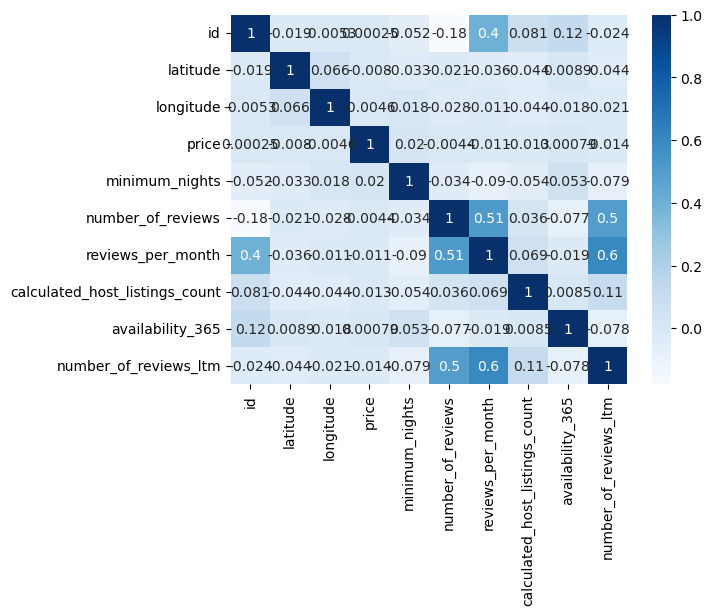

In [81]:
# Plot the heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

Setting the sns with whitegrid

In [82]:
sns.set(style='whitegrid')

### **Creating the Pairplot** for numerical columns, using the columns shows above

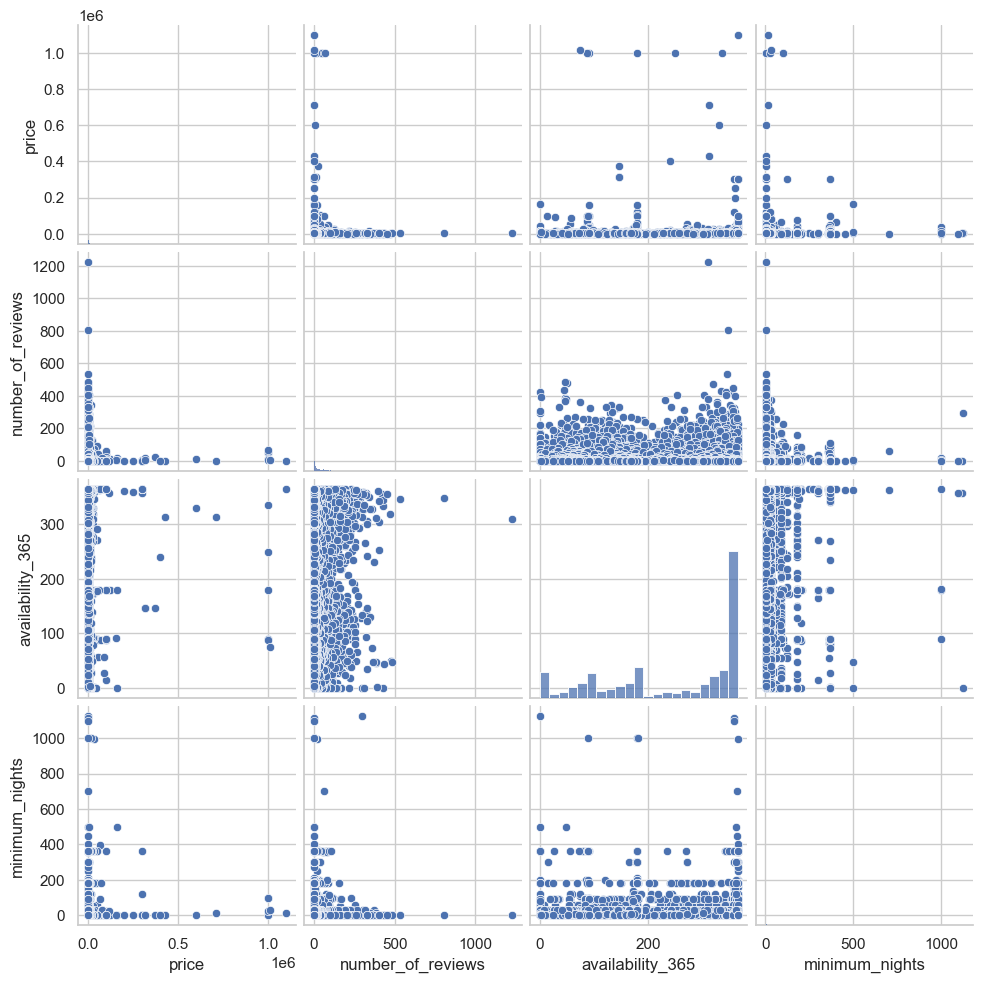

In [83]:
sns.pairplot(df[['price', 'number_of_reviews', 'availability_365', 'minimum_nights']])

> ### **INSIGHT!**

- Price and Number of Reviews have no correlation.
- Number of reviews and Minimum Nights have no correlation.
  
#### New insights!
- We can summarize it with actually it wasn't as what I expected as first. I expected at least one pair can have strong correlation, but there's none in this case.
- I can assume that most of these columns are either have no correlations (zero correlations) or weak correlations.

Reference Notes:
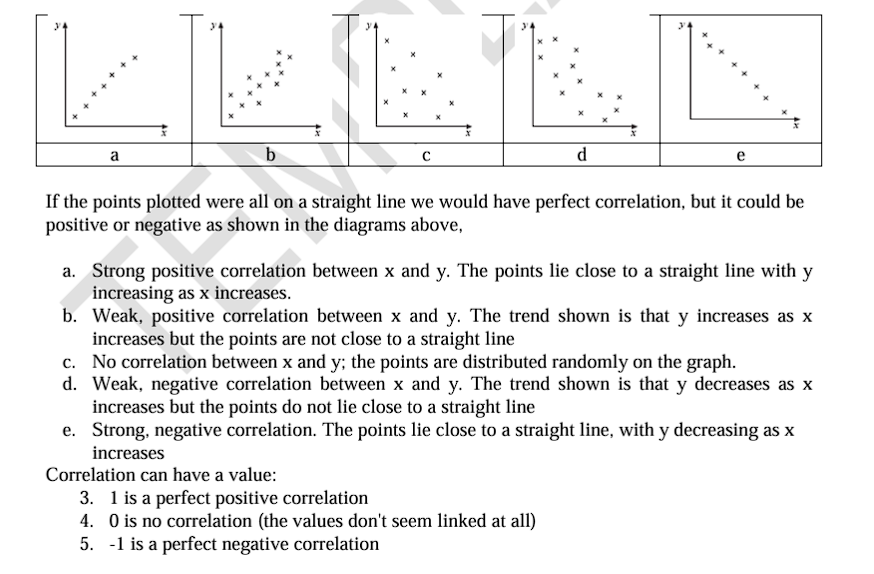
Reference: [click here!)](https://sesricdiag.blob.core.windows.net/oicstatcom/TEXTBOOK-CORRELATION-AND-REGRESSION-ANALYSIS-EGYPT-EN.pdf)

---
---

In [84]:
df_clean

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,is_ascii
0,27934,nice room with superb city view,120437,nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,True
1,27979,"easy going landlord,easy place",120541,emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0,True
2,28745,modern-style apartment in bangkok,123784,familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaT,NaN,1,365,0,True
3,35780,spacious one bedroom at the kris condo bldg. 3,153730,sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1,True
4,941865,suite room 3 at metropoint,610315,kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaT,NaN,3,365,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近btson nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaT,NaN,1,362,0,False
15850,790474503157243541,euro luxuryhotel pratunammkt triplebdnrshoping...,491526222,phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaT,NaN,14,365,0,True
15851,790475335086864240,euro luxuryhotel pratunammkt twinbednrshopingarea,491526222,phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0,True
15852,790475546213717328,euro luxuryhotel pratunammkt twinbednrshopingarea,491526222,phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0,True


In [85]:
df_clean.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
is_ascii                             0
dtype: int64

Converting df_clean to new csv file`

In [86]:
df_clean.to_csv('airbnb_cleaned.csv', index = False)

---

> # ✈️🧳 **SUMMARY / Overview** 🧳✈️

Through the Airbnb platform,  the travel and hospitality industryin Bangkok, Thailand  has undergone a significanttransformation.. In Bangkok, Thailand, the booming tourism sector is accompanied by a surge in available Airbnb listings due to affordable prices. However, this growth is accompanied by regulatory issues, market distortion, and negative economic impacts.



## Problem Statement

- Regulatory Issues: Unrestricted rentals expose hotels and local residents to the negative externalities of short-term rental apartments.
- Market Disruption: Zero-cost renting, such as "zero-condo condos," results in unsustainable price levels for traditional hotels.
- Sustained  Issues: Lax oversight leads to concerns aboutr tax and safety regulations.


## 🤔❔ Insight Questions

- What areas of travel accommodation do people focus on when visiting Bangkok?
- What changes can be made to listings to make them more appealing than hotels?
- What regulatory changes would be beneficial to the hotel industry as well as  short-term rentals?
- Do hosts listing with alphabetical names have higher popularity than Thai, Korean, or Chinese(Mandarin) hosts listing name??


## 🔍 Exploratory Data Analysis (EDA)

Room Type Popularity

- The "entire home/apartment" option dominates the room selection at 68.9%.
- Private rooms are the second most popular room selection with 24.6%.
- Shared rooms and hotel rooms have far fewer listings.

## Problem Statement

- The prices of listings range from 0 to 1,100,000 THB, with a significant spread.
- Mean price: 3,197 THB; Median price: 1,200 THB.
- The "entire home/apt" and "Private room" categories have outliers.



## Top Hosts

- There are 2053 hosts with multiple listings.
- The most prolific host is ID 201677068, with 228 listings.

## 🌏 Geospatial Analysis

Neighborhood Insights

- The mean prices vary greatly among neighborhoods.

- Price  and availability trends were captured in visualizations.



## 🔬 Statistical Analysis

ASCII vs. Non-ASCII Host Names

- Hypothesis:

    - H0: More popular names will be ASCII.
    - H1: Non-ASCII names will be more popular.


## 🌠Key Findings 🌠

- ASCII names dominate with 13,067  to 2,787 Non-ASCII names.
- Non-ASCII names win in terms of total reviews and reviews in the past year.
- In another words, we can say that ASCII or Non-ASCII characters host listing name, does have a difference.
- Non-ASCII names (Using other languages and adding emojis and signs and logos) do attract consumer to chose their place to stay while they're in Bangkok, Thailand for vacations.
- In another words, it can also seems like there might be some tourists from local or some tourist who understand another languages that are not alphabeticals.


## T-test results:

- Number of reviews: 
  - T-test = -0.94;
  - P-value = 0.35 
  - No significant difference.

- Last 12 months: 
  - T-test = -2.12
  - P-value = 0.03 
  - Significant difference
  
## ANOVA Test On Room Type

- We found out that there is no room type with different average.
- ANOVA = 1.85 with P-Value = 0.14


## Accomplishments:

- F-statistic = 1.85; P-value = 0.14 (indicating no difference in mean prices  for  different room types).

## 📈 Key Findings

- The room type popularity is represented with a pie chart and bar plot.

- The neighborhood price distribution is represented using a bar plots.
- A pairplot for  numerical columns shows weak correlations with price, reviews, minimum nights, and availability.



## 🚀  What can be done after this?

- Conduct further geospatial analysis using Tableau for region-specific data.
- Apply further NLP methods to explore listing and host name from the DataFrame.

---

> # 💡**SUGGESTIONS!**

### 🏨 Strategic Recommendations for Hotels Competing with Entire Homes or Apartements!

- Match Personalization & Local Flavor

  - Add local touches: Thai décor, welcome gifts, curated city experiences.

  - Showcase cultural immersion in listing photos.

- Flexibility is Key

- Offer late check-ins, short stays, and generous cancellation policies.

- Brand Differently on Airbnb

  - Use local language, emojis, and icons in titles and names to boost engagement.
  - Think like a host, not a hotel brand—make it feel personal.
  - Focus on Value, Not Just Price

- Highlight benefits per baht like:
    - Breakfast included. 
    - High-speed Wi-Fi.
    - 24/7 check-in.
    - Safety and service assurance.
  
- Partner with Airbnb Directly
    - Create Boutique Hotel listings
    - Train staff in Airbnb-style communication: friendly, local, responsive.

- Improve Listings
    - Use high-quality lifestyle photos.
    - Include detailed local tips and neighborhood guides.
    - Emphasize what differentiates your property from standard homes.